In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')


In [2]:
#!unzip '/content/drive/MyDrive/Datasets/Augmented_data_set.zip' -d '/content/drive/MyDrive/Datasets/'


In [3]:
import matplotlib.pyplot as plt
from keras_preprocessing.image import load_img
import tensorflow as tf
image_path = "C:/Users/mosiu/Pictures/thesis/Augmented_data_set/Alphabet_13/alp_13_0_9574.jpeg"

# img = load_img(image_path, target_size = (64, 64))
# print(type(img))
# print(img.format)
# plt.imshow(img)


In [1]:
from pathlib import Path
data_dir = Path('C:\\Users\\mosiu\\Pictures\\thesis\\Augmented_data_set\\')


In [2]:
image_count = len(list(data_dir.glob('*/*.jpeg')))
print(image_count)


29708


In [6]:
batch_size = 1000
img_height = 64
img_width = 64


In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 29708 files belonging to 1 classes.
Using 23767 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 29708 files belonging to 1 classes.
Using 5941 files for validation.


In [9]:
# df.class_names
class_names = train_ds.class_names
print(class_names)


['Augmented_data_set']


In [10]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(1000, 64, 64, 3)
(1000,)


In [11]:
normalization_layer = tf.keras.layers.Rescaling(1./255)


In [12]:
import numpy as np
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.0 1.0


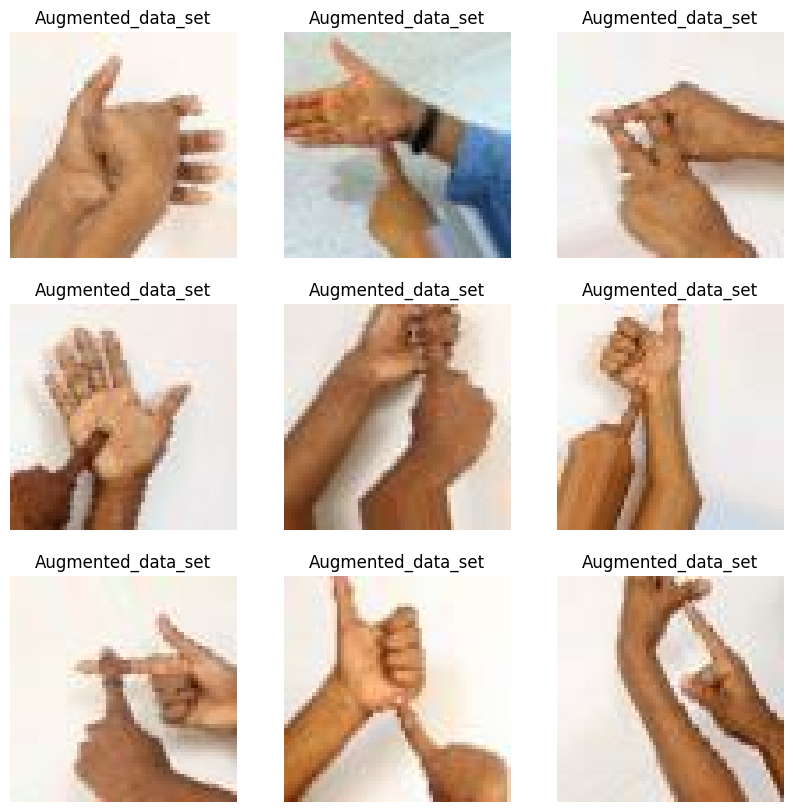

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [15]:
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, Rescaling
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from tensorflow import keras
num_classes = 24
model = Sequential()
model.add(preprocess_input())
# convolutional layer 1
model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(
    1, 1), activation='relu', input_shape=(64, 64, 3)))
# average pooling layer 1
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# convolutional layer 2
model.add(Conv2D(filters=16, kernel_size=(5, 5),
          strides=(1, 1), activation='relu'))
# average pooling layer 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

# fully connected
model.add(Dense(units=120, activation='relu'))
# fully connected
model.add(Dense(units=84, activation='relu'))
# output layer
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))
# model = tf.keras.Sequential([
#   tf.keras.layers.Rescaling(1./255),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(num_classes)
# ])


In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])


In [17]:
# model.build(input_shape=(64,64,3))
# model.summary()


In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])


In [28]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
24/24 [==============================] - 50s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
24/24 [==============================] - 48s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
24/24 [==============================] - 48s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
24/24 [==============================] - 48s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 55s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 53s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 48s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss

In [30]:
print(history)


In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x=val_ds)
# your shown predictions:
predict = np.array(y_pred)
predict_class = np.argmax(predict, axis=1)
predict_class = predict_class.tolist()


6/6 [==============================] - 4s 645ms/step


In [ ]:
print(confusion_matrix(val_ds, predict_class))


In [20]:
#model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
